<a href="https://colab.research.google.com/github/JiaUddinPhD/AI-Visualization-From-Fundamentals-to-Practical-Applications/blob/main/GroupPredictionBusinessStudiesLatest_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from pandas import read_excel

my_sheet = 'Business Studies'
file_name = '/content/Group prediction by Regressor-Dataset.xlsx'
df = read_excel(file_name, sheet_name = my_sheet)

In [ ]:
df.head()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Group SSC,Overall GPA SSC
0,1,4,1,0,2,0,0,7,0,4.25,...,3.28,4.0,3.5,3.5,4.0,4.0,5.0,3.5,1,3.56
1,1,5,1,0,2,50000,0,4,0,5.00,...,5.00,4.0,5.0,5.0,5.0,5.0,5.0,5.0,1,5.00
2,1,4,2,1,2,30000,0,3,6,5.00,...,4.90,4.0,5.0,5.0,5.0,3.5,4.0,5.0,1,4.67
3,1,5,4,0,2,90000,0,1,5,5.00,...,5.00,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1,4.68
4,1,1,0,1,2,100000,35000,7,4,4.55,...,5.00,4.0,5.0,4.0,5.0,5.0,5.0,5.0,1,4.55


In [ ]:
df.head()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Group SSC,Overall GPA SSC
0,1,4,1,0,2,0,0,7,0,4.25,...,3.28,4.0,3.5,3.5,4.0,4.0,5.0,3.5,1,3.56
1,1,5,1,0,2,50000,0,4,0,5.00,...,5.00,4.0,5.0,5.0,5.0,5.0,5.0,5.0,1,5.00
2,1,4,2,1,2,30000,0,3,6,5.00,...,4.90,4.0,5.0,5.0,5.0,3.5,4.0,5.0,1,4.67
3,1,5,4,0,2,90000,0,1,5,5.00,...,5.00,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1,4.68
4,1,1,0,1,2,100000,35000,7,4,4.55,...,5.00,4.0,5.0,4.0,5.0,5.0,5.0,5.0,1,4.55


In [ ]:
df.tail()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Group SSC,Overall GPA SSC
105,0,5,3,0,2,186000,7000,3,0,4.86,...,4.20,3.5,5.0,4.0,3.5,5.0,3.5,5.0,1,4.50
106,0,4,4,0,2,75000,0,1,0,4.78,...,5.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,4.44
107,1,4,4,0,2,125000,50000,2,0,4.58,...,4.80,5.0,5.0,3.5,5.0,5.0,5.0,5.0,1,4.50
108,0,5,5,2,2,0,0,5,0,4.86,...,4.15,3.5,3.5,3.0,4.0,4.0,4.0,4.0,1,4.44
109,1,4,5,1,2,50000,0,1,0,4.70,...,4.20,3.5,5.0,4.0,3.5,5.0,3.5,5.0,1,4.50


In [ ]:
df.describe()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Group SSC,Overall GPA SSC
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0,110.000000
mean,0.709091,3.163636,2.554545,0.727273,1.872727,68163.636364,7468.181818,2.409091,1.427273,4.430182,...,4.392273,4.190909,4.090909,4.136364,4.309091,4.445455,4.413636,4.363636,1.0,4.291455
std,0.456260,1.672921,1.547928,0.728315,0.471365,100179.062369,19248.052120,1.698869,1.809552,0.607023,...,0.571386,0.738775,0.974872,0.818112,0.744958,0.733677,0.669996,0.756953,0.0,0.546397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.360000,...,2.780000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.0,2.940000
25%,0.000000,2.000000,2.000000,0.000000,2.000000,20000.000000,0.000000,1.000000,0.000000,4.250000,...,4.150000,3.500000,3.500000,3.500000,4.000000,4.000000,4.000000,4.000000,1.0,4.060000
50%,1.000000,4.000000,3.000000,1.000000,2.000000,50000.000000,0.000000,2.000000,0.000000,4.590000,...,4.500000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.0,4.390000
75%,1.000000,5.000000,4.000000,1.000000,2.000000,78750.000000,0.000000,3.000000,2.750000,4.860000,...,4.890000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,4.680000
max,1.000000,5.000000,5.000000,2.000000,2.000000,800000.000000,100000.000000,8.000000,7.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,5.000000


In [ ]:
df.shape

(110, 26)

In [ ]:
df.columns

Index(['Gender', 'Father Highest Academic Qualification',
       'Mother Highest Academic Qualification', 'Father Profession',
       'Mother Profession', 'Father average monthly income',
       'Mother average monthly income', 'How many siblings do you have',
       'District Currently you are living', 'PEC Result Overall GPA',
       'PEC  Bangla', 'PEC English', 'PEC Mathematics', 'PEC Religion',
       'PEC  BGS', 'PEC Science', 'JSC Overall GPA', 'JSC Bangla',
       'JSC English', 'JSC Mathematics', 'JSC  BGS', 'JSC  ICT',
       'JSC Religion', 'JSC Science', 'Group SSC', 'Overall GPA SSC'],
      dtype='object')

In [ ]:
df.nunique()

,0
Gender,2
Father Highest Academic Qualification,6
Mother Highest Academic Qualification,6
Father Profession,3
Mother Profession,3
Father average monthly income,34
Mother average monthly income,19
How many siblings do you have,9
District Currently you are living,8
PEC Result Overall GPA,50


In [ ]:
df.isnull().sum()

,0
Gender,0
Father Highest Academic Qualification,0
Mother Highest Academic Qualification,0
Father Profession,0
Mother Profession,0
Father average monthly income,0
Mother average monthly income,0
How many siblings do you have,0
District Currently you are living,0
PEC Result Overall GPA,0


In [ ]:
df.drop('Group SSC', axis=1, inplace=True)

In [ ]:
df

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
0,1,4,1,0,2,0,0,7,0,4.25,...,4.0,3.28,4.0,3.5,3.5,4.0,4.0,5.0,3.5,3.56
1,1,5,1,0,2,50000,0,4,0,5.00,...,5.0,5.00,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.00
2,1,4,2,1,2,30000,0,3,6,5.00,...,5.0,4.90,4.0,5.0,5.0,5.0,3.5,4.0,5.0,4.67
3,1,5,4,0,2,90000,0,1,5,5.00,...,5.0,5.00,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.68
4,1,1,0,1,2,100000,35000,7,4,4.55,...,5.0,5.00,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,5,3,0,2,186000,7000,3,0,4.86,...,5.0,4.20,3.5,5.0,4.0,3.5,5.0,3.5,5.0,4.50
106,0,4,4,0,2,75000,0,1,0,4.78,...,5.0,5.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.44
107,1,4,4,0,2,125000,50000,2,0,4.58,...,3.5,4.80,5.0,5.0,3.5,5.0,5.0,5.0,5.0,4.50
108,0,5,5,2,2,0,0,5,0,4.86,...,4.0,4.15,3.5,3.5,3.0,4.0,4.0,4.0,4.0,4.44


In [ ]:
from sklearn.preprocessing import scale

In [ ]:
y=df['Overall GPA SSC']
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Overall GPA SSC'],axis=1)
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [ ]:
y_pred_test_x = regressor.predict(X_test)

In [ ]:
print(y_pred_test_x)

[4.33066397 4.85489497 4.4702594  4.48273274 3.792501   3.47613061
 4.39586075 4.23709955 4.37056981 4.48027327 4.27769662 4.49931465
 3.86862158 4.1738783  4.63649245 4.16218472 4.08212386 4.40820591
 4.09190478 4.40336722 4.82325284 4.52219865 4.53243543 4.51486769
 3.97048392 4.67591704 4.312433   4.41281571 3.71413006 4.57656935
 4.24396894 4.37186857 4.59670414]


In [ ]:
print(y_test)

78     4.17
10     4.89
4      4.55
84     4.39
64     3.83
68     2.94
30     4.18
45     3.00
96     4.22
11     4.83
79     4.11
80     4.17
0      3.56
81     4.00
18     4.67
70     4.33
56     4.29
72     4.28
108    4.44
42     5.00
12     5.00
36     4.55
65     5.00
26     5.00
22     4.00
31     5.00
47     3.67
76     4.17
15     3.33
44     4.86
89     4.44
90     4.39
9      4.89
Name: Overall GPA SSC, dtype: float64


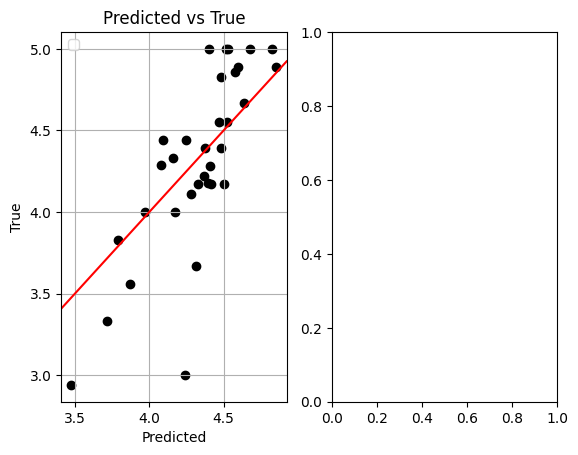

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(y_pred_test_x, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
plt.show()

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(y_test, y_pred_test_x)

6.787911716926855

In [ ]:
mad = mean_absolute_error(y_test, y_pred_test_x)
print("Mean Absolute Deviation:", mad)

Mean Absolute Deviation: 0.2705419705579081


In [ ]:
rmse = mean_squared_error(y_test, y_pred_test_x, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.3608573146157074


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
r2 = r2_score(y_test, y_pred_test_x)
print("R-squared Score:", r2)

R-squared Score: 0.569893760066031


Text(0.5, 0, 'Permutation Importance')

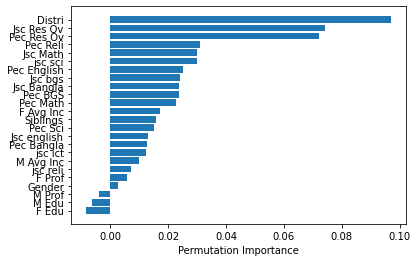

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(regressor, X_test, y_test)

feature_names = ['Gender', 'F Edu', 'M Edu', 'F Prof', 'M Prof', 'F Avg Inc', 'M Avg Inc', 'Siblings', 'Distri','Pec Res Ov' ,'Pec Bangla','Pec English', 'Pec Math', 'Pec Reli', 'Pec BGS', 'Pec Sci', 'Jsc Res Ov','Jsc Bangla','Jsc english','Jsc Math','Jsc bgs','jsc ict','jsc reli', 'jsc sci']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred_test_x = rf_regressor.predict(X_test)

In [ ]:
print(y_pred_test_x)

[4.3348 4.8628 4.7802 4.3836 3.6764 3.1771 4.4852 4.4923 4.3239 4.2056
 4.3323 4.3538 3.6185 4.3173 4.6332 4.1322 3.8675 4.4788 4.3619 4.4913
 4.8353 4.7388 4.8213 4.7806 4.104  4.7072 4.4867 4.3428 4.1455 4.7742
 4.2297 4.2849 4.4958]


In [ ]:
mape(y_test, y_pred_test_x)

7.184943083331199

In [ ]:
mad = mean_absolute_error(y_test, y_pred_test_x)
print("Mean Absolute Deviation:", mad)

Mean Absolute Deviation: 0.28237878787878734


In [ ]:
rmse = mean_squared_error(y_test, y_pred_test_x, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.4049510733634138


In [ ]:
r2 = r2_score(y_test, y_pred_test_x)
print("R-squared Score:", r2)

R-squared Score: 0.569893760066031


In [ ]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'Permutation Importance')

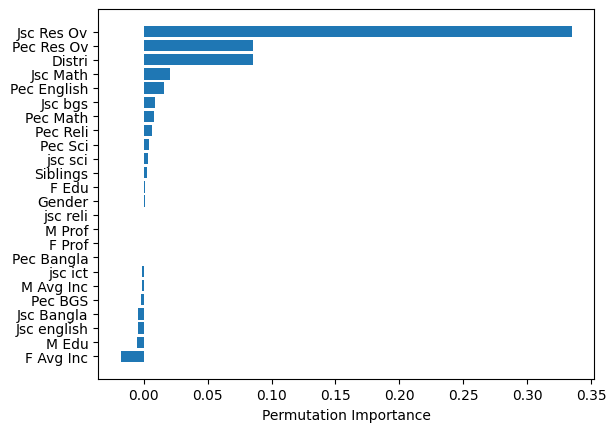

In [ ]:
perm_importance = permutation_importance(rf_regressor, X_test, y_test)

feature_names = ['Gender', 'F Edu', 'M Edu', 'F Prof', 'M Prof', 'F Avg Inc', 'M Avg Inc', 'Siblings', 'Distri','Pec Res Ov' ,'Pec Bangla','Pec English', 'Pec Math', 'Pec Reli', 'Pec BGS', 'Pec Sci', 'Jsc Res Ov','Jsc Bangla','Jsc english','Jsc Math','Jsc bgs','jsc ict','jsc reli', 'jsc sci']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Coefficients:  [-0.02365827 -0.0563888  -0.02390278 -0.0131522  -0.07896082  0.04710964
  0.04337465 -0.02702048  0.13443565  0.20630159  0.07010033  0.0435104
 -0.07725165 -0.00358325  0.01017886  0.0246336   0.37793279 -0.08256748
  0.00597762 -0.01151428 -0.00909582 -0.02731431  0.01100474  0.03928534]
Variance score: 0.4956184792411591


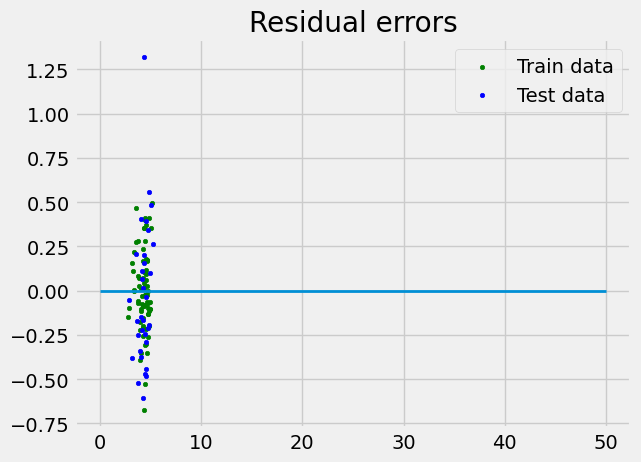

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()


In [ ]:
print(y_pred_test_x)

[4.3348 4.8628 4.7802 4.3836 3.6764 3.1771 4.4852 4.4923 4.3239 4.2056
 4.3323 4.3538 3.6185 4.3173 4.6332 4.1322 3.8675 4.4788 4.3619 4.4913
 4.8353 4.7388 4.8213 4.7806 4.104  4.7072 4.4867 4.3428 4.1455 4.7742
 4.2297 4.2849 4.4958]


In [ ]:
y_pred_test_x = reg.predict(X_test)

In [ ]:
mape(y_test, y_pred_test_x)

7.501922601379696

In [ ]:
mad = mean_absolute_error(y_test, y_pred_test_x)
print("Mean Absolute Deviation:", mad)

Mean Absolute Deviation: 0.3099464190603751


In [ ]:
rmse = mean_squared_error(y_test, y_pred_test_x, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.3907754075091184


In [ ]:
r2 = r2_score(y_test, y_pred_test_x)
print("R-squared Score:", r2)

R-squared Score: 0.4956184792411592


Text(0.5, 0, 'Permutation Importance')

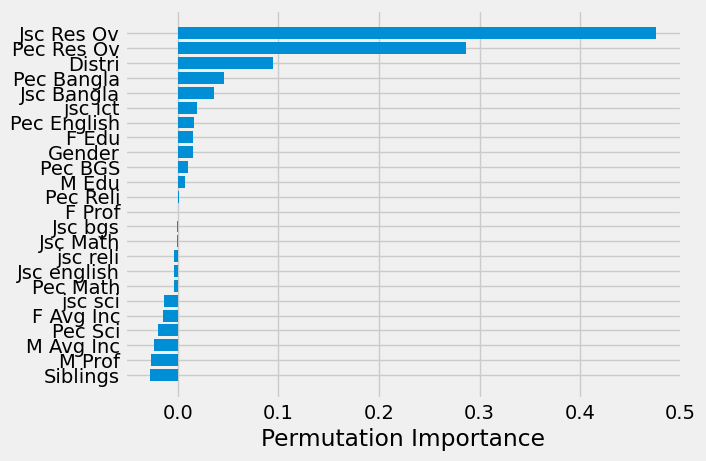

In [ ]:
perm_importance = permutation_importance(reg, X_test, y_test)

feature_names = ['Gender', 'F Edu', 'M Edu', 'F Prof', 'M Prof', 'F Avg Inc', 'M Avg Inc', 'Siblings', 'Distri','Pec Res Ov' ,'Pec Bangla','Pec English', 'Pec Math', 'Pec Reli', 'Pec BGS', 'Pec Sci', 'Jsc Res Ov','Jsc Bangla','Jsc english','Jsc Math','Jsc bgs','jsc ict','jsc reli', 'jsc sci']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")